In [31]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, neighbors, svm

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

import warnings, random
from collections import Counter
from math import sqrt

In [32]:
df = pd.read_csv('data/breast-cancer-wisconsin.data')
df.replace('?', -99999,inplace=True)
df.drop(['id'],1,inplace=True)

In [33]:
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

In [34]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

In [35]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.971428571429


In [37]:
# Coded made k-nearest neighbors
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,2,2,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures),-1)

In [38]:
prediction = clf.predict(example_measures)
print(prediction)

[2 2]


In [39]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r': [[6,5],[7,7],[8,6]]}
new_features = [5,7]

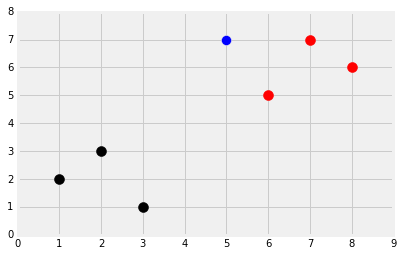

In [40]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1], s=100)
plt.show()

In [41]:
def k_nearest_neighbors(data,predict,k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    return vote_result, confidence

In [42]:
result = k_nearest_neighbors(dataset, new_features, k=3)
print(result)

('r', 1.0)


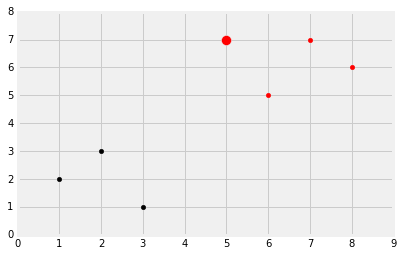

In [43]:
[[plt.scatter(ii[0], ii[1], color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1],s=100,c=result[0])
plt.show()

In [44]:
print(df.head())
full_data = df.astype(float).values.tolist()

    clump_thickness  unif_cell_size  unif_cell_shape  marg_adhesion  \
0                 5               1                1              1   
1                 5               4                4              5   
2                 3               1                1              1   
3                 6               8                8              1   
4                 4               1                1              3   

   single_epith_cell_size bare_nuclei  bland_chrom  norm_nucleoli  mitoses  \
0                       2           1            3              1        1   
1                       7          10            3              2        1   
2                       2           2            3              1        1   
3                       3           4            3              7        1   
4                       2           1            3              1        1   

   class  
0      2  
1      2  
2      2  
3      2  
4      2  


In [45]:
random.shuffle(full_data)

In [46]:
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [47]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [48]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        #else:
            #print(confidence)
        total += 1
print('Accuracy: ',correct/total)

Accuracy:  0.9496402877697842


In [49]:
clf = neighbors.KNeighborsClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.971428571429


In [50]:
clf = svm.SVC()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.964285714286
